In [1]:
#Importing Necessary Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import BernoulliNB

In [2]:
#Importing Data which was encoded by'latin-1'
data=pd.read_csv('SMS_SPAM.csv',encoding='latin-1')

In [3]:
data.head()

,spam,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
X=data.sms
y=data.spam

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
# to boost the accuracy of the spam
from sklearn.feature_selection import SelectPercentile 

In [6]:
tf=TfidfVectorizer()

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

In [8]:
X_train_tf=tf.fit_transform(X_train)
X_test_tf=tf.transform(X_test)

In [9]:
# Naives BayesBernoulli Text Classification as it is binary classification
bnb=BernoulliNB() 

In [10]:
bnb.fit(X_train_tf,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [11]:
b_pred=bnb.predict(X_test_tf)

In [12]:
accuracy_score(y_test,b_pred) # accuracy without using any kind of boosting

0.976688583383144

In [13]:
pd.crosstab(y_test,b_pred)

col_0,ham,spam
spam,,
ham,1447,0
spam,37,187
spam,0,2


In [14]:
selector=SelectPercentile(percentile=13)
selector.fit(X_train_tf,y_train)

C:\Users\RISHABH\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


SelectPercentile(percentile=13,
         score_func=<function f_classif at 0x000001CEF3F62048>)

In [15]:
X_train_tfs=selector.transform(X_train_tf).toarray()
X_test_tfs=selector.transform(X_test_tf).toarray()

In [16]:
bnb.fit(X_train_tfs,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [17]:
b2_pred=bnb.predict(X_test_tfs)

In [18]:
accuracy_score(y_test,b2_pred) #accuracy after using SelectPercentile 

0.9844590555887627

In [19]:
pd.crosstab(y_test,b2_pred)

col_0,ham,spam
spam,,
ham,1445,2
spam,22,202
spam,0,2


In [22]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, b2_pred))

0.9844590555887627


In [23]:
print(metrics.classification_report(y_test, b2_pred))

             precision    recall  f1-score   support

        ham       0.99      1.00      0.99      1447
       spam       0.98      0.90      0.94       224
      spam        0.00      0.00      0.00         2

avg / total       0.98      0.98      0.98      1673



C:\Users\RISHABH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
con_metric = metrics.confusion_matrix(y_test, b2_pred)
con_metric

array([[1445,    2,    0],
       [  22,  202,    0],
       [   0,    2,    0]], dtype=int64)

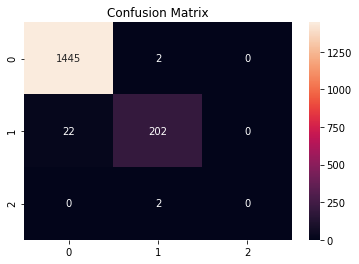

In [33]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()